## Decision Tree Classifier for separating species of iris flower set based on features

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Separate X and Y features

In [9]:
X = df.drop(labels=['species'], axis=1)
Y =df[['species']]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Label encoder for Y features

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species'] = le.fit_transform(Y['species'])

In [13]:
Y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


##### Preprocessing of numeric features with pipeline

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [15]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])

In [16]:
X_pre = num_pipe.fit_transform(X)

In [17]:
X_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [18]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [19]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [20]:
X_pre.shape

(150, 4)

##### Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [22]:
xtrain.shape

(120, 4)

In [23]:
xtest.shape

(30, 4)

In [24]:
ytrain.shape

(120, 1)

In [25]:
ytest.shape

(30, 1)

### Build Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=21)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(random_state=21)

### Model Evaluation

In [27]:
model.score(xtrain,ytrain)

1.0

In [28]:
model.score(xtest,ytest)

0.9333333333333333

### Hyper parameter tuning

In [29]:
params = {'max_depth':[2,3,4,5,6],
         'min_samples_split':[4,5,6,7,8],
          'criterion':['gini','entropy'] }

In [30]:
from sklearn.model_selection import GridSearchCV
model1 = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(model1,param_grid=params,cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 7, 8]},
             scoring='f1_macro')

In [31]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 4}

In [32]:
gscv.best_estimator_

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)

In [33]:
gscv.best_score_

0.9749673202614378

In [34]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=2, min_samples_split=4, random_state=42)

In [35]:
best_dtc.score(xtrain,ytrain)

0.975

In [36]:
best_dtc.score(xtest,ytest)

0.8333333333333334

#### from hyperparameter tuning model score is not improved, so we will proceed with base model only

#### Visualize Decision Tree

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

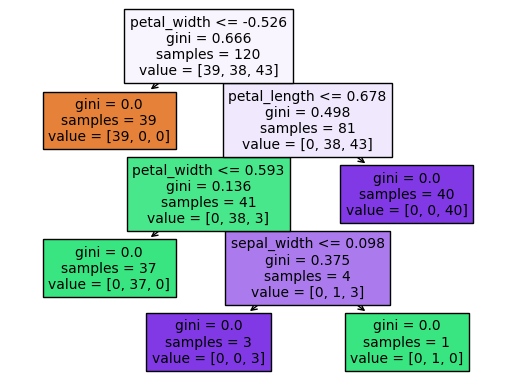

In [38]:

plot_tree(model,filled=True,feature_names=list(xtrain.columns))
plt.show()

In [39]:
ytrain.value_counts()

species
2          43
0          39
1          38
Name: count, dtype: int64

### Evaluate best model based on the data

In [40]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [41]:
ypred_tr

array([0, 2, 1, 0, 2, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 1, 0, 1, 0,
       1, 2, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0,
       2, 1, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 0, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0,
       0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 1, 2, 1, 1, 2, 2, 0, 0, 1])

In [42]:
ypred_ts

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2])

### Confusion Matrix

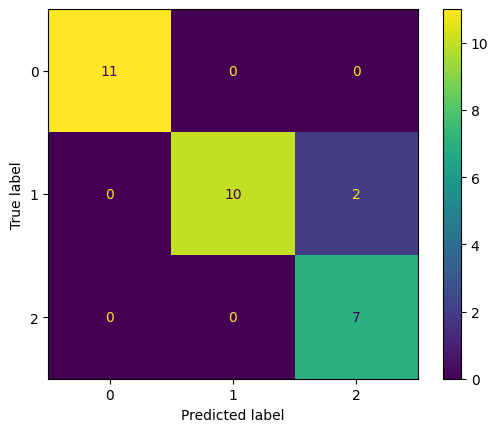

In [44]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=model.classes_)
cfd.plot()

### Classifier Report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



### Getting back original labels

In [46]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [47]:
ypred_tr_lb

array(['setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'vers

In [48]:
ypred_ts_lb

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica'],
      dtype=object)